# Bài thực hành số 2.2

Chào mừng đến với bài thực hành số 2.2, trong bài thực hành này ta sẽ học về model YOLOv5, cách để huấn luyện nó với tập data của chúng ta đã chuẩn bị
trước từ bài thực hành số 4 và cách đánh giá nó thông qua một vài thông số quan trọng.

## Tổng quan

**YOLO (You Only Look Once)** là một trong những kiến trúc hàng đầu cho bài toán nhận diện và phát hiện vật thể trong các ứng dụng thị giác máy tính. Phiên bản YOLOv5 là một bước tiến quan trọng trong dòng các mô hình YOLO, được phát hành vào năm **2020** bởi Ultralytics. Mặc dù không phải là phiên bản chính thức tiếp nối từ YOLOv4, YOLOv5 đã nhanh chóng trở nên phổ biến nhờ vào sự cải thiện đáng kể về hiệu suất và tính dễ sử dụng.

**Tổng kết**

YOLOv5 đã đem lại nhiều cải tiến lớn về tốc độ và hiệu suất cho các bài toán nhận diện vật thể. Với sự linh hoạt và hiệu quả, nó trở thành một trong những công cụ chính được sử dụng trong các hệ thống xe tự hành, giúp xe có thể nhận diện và phản ứng với môi trường xung quanh một cách nhanh chóng và chính xác.

## Mục tiêu học tập
Sau khi hoàn thành bài thực hành này, học viên sẽ học được các kiến thức:
  - Hiểu rõ hơn về model YOLOv5
  - Cách huấn luyện mô hình với dataset tùy chỉnh.
  - Đánh giá hiệu suất của model với các thông số quan trọng.

## Những kiến thức liên quan
  - Python
  - YOLO

## Nền tảng cần thiết
Để thực hiện được bài thực hành, bạn sẽ cần có những kiến thức sau:
  - Kĩ năng lập trình cơ bản với Python

## Bài toán
**Mục tiêu**: Huấn luyện được model YOLOv5 với dataset tùy chỉnh.

**Yêu cầu**:
- input: bộ dataset đã được chuẩn bị từ bài thực hành số 4.
- ouput: bộ weight của model đã train và hiệu suất của chúng.

## Hướng dẫn

Dưới đây là các bước để bạn có thể huấn luyện model YOLOv5 với bộ dataset của bạn.


### Thư viện và các tài nguyên cần thiết

In [ ]:
#clone YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

### Dataset

Để huấn luyện mô hình tùy chỉnh của mình, chúng tôi cần tập hợp một tập dữ liệu gồm các hình ảnh đại diện với các chú thích hộp giới hạn xung quanh các đối tượng mà chúng tôi muốn phát hiện. Và chúng tôi cần tập dữ liệu của mình ở định dạng YOLOv5.

Hãy làm theo hướng dẫn ở cuối bài thực hành 4 để tải dataset của bạn lên trên file colab này.

**Version**

Ví dụ về một phiên bản của dataset trong roboflow.

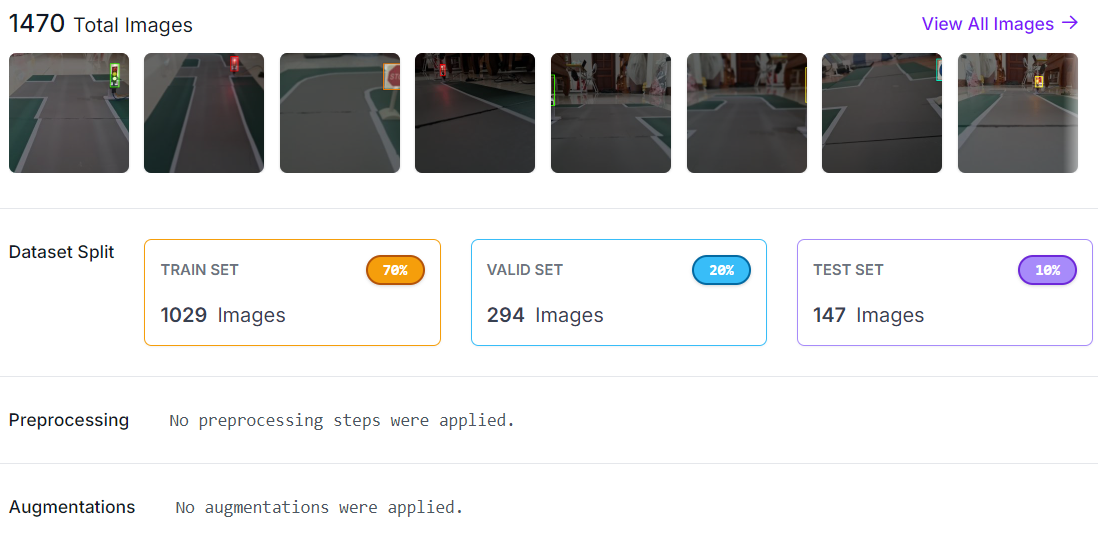


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

**Bài tập 1:** Hoàn thành đoạn code sau để tải dataset lên colab.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key=[...])
project = rf.workspace().project([...])
version = project.version([...])
dataset = project.version([...]).download([...])

### Huấn luyện model

Một vài tham số cơ bản:
- **img:**: kích cỡ ảnh đầu vào, là bội số của 32
- **batch:** kích cỡ của batch
- **epochs:** số lượng epochs
- **data:** đường dẫn tới dataset
- **weights:** đường dẫn đến trọng số để bắt đầu huấn luyện từ đó. Ở đây chúng tôi chọn trọng số đã được huấn luyện trước trên tập data COCO.

**Bài tập 2:** Hoàn thành đoạn code sau bằng việc lựa chọn các tham số để huấn luyện model.

In [ ]:
!python train.py --img [...] --batch [...] --epochs [...] --data {dataset.location}/data.yaml --weights yolov5s.pt

### Đánh giá model

Tổn thất trong quá trình đào tạo và số liệu hiệu suất được lưu vào Tensorboard cũng như vào tệp nhật ký.

Chúng tôi sẽ hướng dẫn bạn cách đánh giá hiệu suất của mô hình YOLOv5 qua ba tham số chính: **mAP_0.5**, **Precision**, **Confidence**, và **Loss**.

**mAP_0.5 (Mean Average Precision at IoU 0.5)**
- **Giải thích**: mAP_0.5 đo lường độ chính xác trung bình của mô hình khi phát hiện vật thể với ngưỡng IoU (Intersection over Union) là 0.5. IoU đo lường mức độ chồng khớp giữa hộp dự đoán của mô hình và hộp thực tế.
- **Tiêu chí đánh giá**: Giá trị mAP_0.5 từ 0 đến 1, càng cao thì mô hình càng tốt.
- **Ví dụ**: mAP_0.5 = 0.85 có nghĩa là mô hình dự đoán chính xác 85% các vật thể với IoU tối thiểu 0.5.

**Precision (Độ chính xác)**
- **Giải thích**: Precision là tỷ lệ giữa số dự đoán đúng (True Positives) và tổng số dự đoán (bao gồm cả dự đoán sai - False Positives).
- **Tiêu chí đánh giá**: Precision từ 0 đến 1, càng cao càng tốt. Precision cao nghĩa là mô hình ít báo động sai.
- **Ví dụ**: Nếu Precision = 0.9, thì trong 100 lần dự đoán, có 90 lần mô hình dự đoán đúng vật thể.

**Confidence (Độ tin cậy)**
- **Giải thích**: Confidence là mức độ tin tưởng của mô hình về việc một vật thể tồn tại trong một vùng phát hiện.
- **Tiêu chí đánh giá**: Ngưỡng confidence nên được đặt hợp lý. Nếu đặt quá cao, mô hình sẽ bỏ qua nhiều vật thể (giảm recall); nếu quá thấp, mô hình sẽ nhận diện nhiều vật thể sai (giảm precision).
- **Ví dụ**: Với ngưỡng confidence là 0.8, mô hình chỉ giữ lại các dự đoán mà nó chắc chắn hơn 80% là đúng.

**Loss (Hàm mất mát)**
- **Giải thích**: Loss là giá trị đại diện cho lỗi của mô hình trong quá trình huấn luyện. Loss càng nhỏ, mô hình càng học tốt.
- **Tiêu chí đánh giá**: Giá trị Loss nên càng thấp càng tốt.
- **Ví dụ**: Nếu Loss giảm từ 1.2 xuống 0.3 sau quá trình huấn luyện, điều này cho thấy mô hình đang cải thiện.

**Tổng kết:**
- **mAP_0.5** đánh giá tổng quan độ chính xác của mô hình.
- **Precision** cho biết mô hình có bao nhiêu dự đoán đúng trong số tất cả các dự đoán.
- **Confidence** kiểm soát chất lượng của các dự đoán.
- **Loss** đánh giá quá trình học của mô hình, càng thấp càng tốt.

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

### Chạy hàm `detect` với trọng số đã được huấn luyện
Chạy suy luận bằng điểm kiểm tra đã được huấn luyện trước về nội dung của thư mục `test/image` được tải xuống từ Roboflow.

**Bài tập 3:** Hoàn thành đoạn code sau để có thể xem được kết quả của model trên trập test.

In [ ]:
!python detect.py --weights [...] --img [...] --conf [...] --source [...]

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

### Lưu lại kết quả

Chúc mừng! Bạn vừa train xong một model YOLOv5 của riêng bạn với bộ dataset tùy chỉnh của bạn.

Để cải thiện hiệu suất của model, hãy đến với bài thực hành số 2.3, nơi chúng tôi sẽ phân tích và hướng dẫn rõ hơn về các tham số.

Để có thể lưu lại weights để tái sử dụng và áp dụng lên mô hình xe, hãy chạy code bên dưới.

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download([...])